In [199]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [200]:
data = {
    'collaborator': ['Renan', 'Caíque', 'Dai', 'Marcone', 'Dory', 'Antivírus'],
    'role': ['Dev', 'PM', 'QA', 'Designer', 'Dev', 'Dev'],
    'code_excellence': [8, 9, 10, 5, 9, 9],
    'code_review': [9, 9, 10, 5, 9, 9],
    'tech_refinment': [8, 9, 10, 5, 6, 9],
    'estimates': [8, 8, 10, 5, 8, 9],
    'process_status': [10, 9, 10, 10, 8, 7],
    'feedbacks': [8, 7, 9, 8, 8, 9],
    'attitudes': [8, 9, 10, 8, 9, 9],
    'posture': [10, 10, 10, 9, 9, 9],
    'responsibility': [8, 10, 10, 10, 8, 9],
    'credibility': [10, 10, 10, 10, 9, 9],
    'communication': [10, 7, 10, 8, 7, 8],
    'recommendation': [10, 10, 10, 9, 8, 10],
    
}
df = pd.DataFrame(data)
df.set_index('collaborator', inplace=True)

df

,role,code_excellence,code_review,tech_refinment,estimates,process_status,feedbacks,attitudes,posture,responsibility,credibility,communication,recommendation
collaborator,,,,,,,,,,,,,
Renan,Dev,8,9,8,8,10,8,8,10,8,10,10,10
Caíque,PM,9,9,9,8,9,7,9,10,10,10,7,10
Dai,QA,10,10,10,10,10,9,10,10,10,10,10,10
Marcone,Designer,5,5,5,5,10,8,8,9,10,10,8,9
Dory,Dev,9,9,6,8,8,8,9,9,8,9,7,8
Antivírus,Dev,9,9,9,9,7,9,9,9,9,9,8,10


In [201]:
technicals = df[df['role'] == 'Dev']
technicals = technicals.drop('role', axis=1)
technicals = technicals.reset_index(drop=True)

all = df.drop('role', axis=1)
all = all.reset_index(drop=True)

In [202]:
means = {
    'code_excellence': technicals['code_excellence'].mean(),
    'code_review': technicals['code_review'].mean(),
    'tech_refinment': all['tech_refinment'].mean(),
    'estimates': technicals['estimates'].mean(),
    'process_status': all['process_status'].mean(),
    'feedbacks': all['feedbacks'].mean(),
    'attitudes': all['attitudes'].mean(),
    'posture': all['posture'].mean(),
    'responsibility': all['responsibility'].mean(),
    'credibility': all['credibility'].mean(),
    'communication': all['communication'].mean(),
    'recommendation': all['recommendation'].mean(),
}


means = pd.Series(means)

means

code_excellence    8.666667
code_review        9.000000
tech_refinment     7.833333
estimates          8.333333
process_status     9.000000
feedbacks          8.166667
attitudes          8.833333
posture            9.500000
responsibility     9.166667
credibility        9.666667
communication      8.333333
recommendation     9.500000
dtype: float64

In [203]:
def calculate_nps(df: pd.DataFrame, field: str):
  total = df[field].count()
  promoters = df[df[field]>=9][field].count()
  detractors =  df[df[field]<=6][field].count()


  return ((promoters - detractors)/total) * 100

In [204]:
nps = {
    'code_excellence': calculate_nps(technicals, 'code_excellence'),
    'code_review': calculate_nps(technicals, 'code_review'),
    'tech_refinment': calculate_nps(all, 'tech_refinment'),
    'estimates': calculate_nps(technicals, 'estimates'),
    'process_status': calculate_nps(all, 'process_status'),
    'feedbacks': calculate_nps(all, 'feedbacks'),
    'attitudes': calculate_nps(all, 'attitudes'),
    'posture': calculate_nps(all, 'posture'),
    'responsibility': calculate_nps(all, 'responsibility'),
    'credibility': calculate_nps(all, 'credibility'),
    'communication': calculate_nps(all, 'communication'),
    'recommendation': calculate_nps(all, 'recommendation'),
}


nps = pd.Series(nps)

nps[nps > 80].values

array([100.        , 100.        , 100.        ,  83.33333333])

Text(0.5, 0, 'Skill')

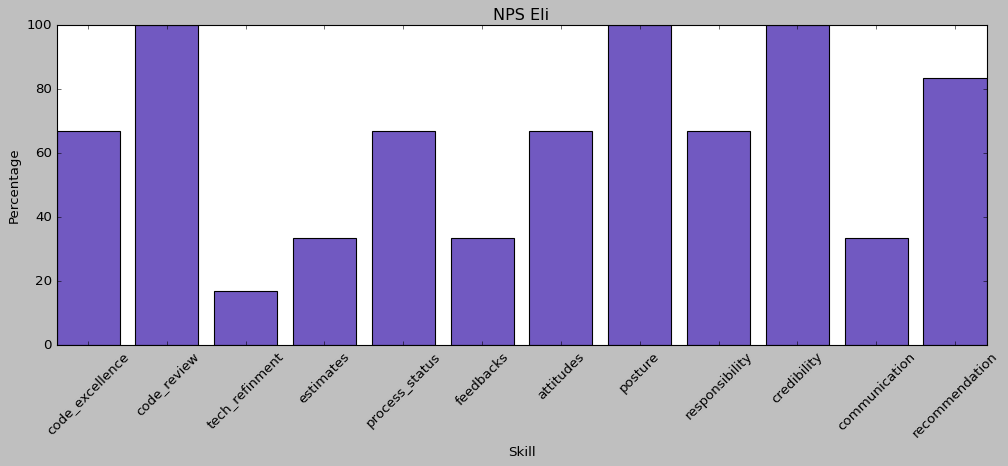

In [205]:
df = df.reset_index(drop=True)
df = df.drop('role', axis=1)
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (15, 5)
plt.xticks(rotation=45)
plt.bar(df.columns.values, nps.values, color='#7159c1')
plt.title('NPS Eli')
plt.ylabel('Percentage')
plt.xlabel('Skill')